# Machine Learning 2024/25
## Assignment 1
-----
#### Group J:
- Carolina Pires, 202408704
- Diogo Teixeira, 201705082
- João Monteiro, 202108347

 April 5th, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Artificial dataset generation

In [2]:
def dynamic_class_sep(n_samples, k=3.0):
    # print(n_samples / k)
    return n_samples / k

In [3]:
def generate_datasets(n_samples=500, noise_level=0.5, k=3.0):
    datasets = {}

    class_sep = dynamic_class_sep(n_samples, k)


    # 2. LDA - Gaussian Distributed Classes
    mean_class_0 = [class_sep, class_sep]
    mean_class_1 = [-class_sep, -class_sep]
    cov_matrix = [[1, 0.5], [0.5, 1]]  # Fixed covariance

    X_0 = np.random.multivariate_normal(mean_class_0, cov_matrix, n_samples // 2)
    X_1 = np.random.multivariate_normal(mean_class_1, cov_matrix, n_samples // 2)
    X_lda = np.vstack((X_0, X_1))
    y_lda = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

    datasets['lda'] = (X_lda, y_lda)

    # 3. QDA - Quadratic Decision Boundary
    X_qda, y_qda = make_classification(n_samples=n_samples, n_features=2, n_classes=2, n_clusters_per_class=2,
                                       n_redundant=0, n_informative=2, class_sep=0.5, random_state=42)
    datasets['qda'] = (X_qda, y_qda)

    # 4. Decision Tree - Complex Boundaries
    X_tree, y_tree = make_moons(n_samples=n_samples, noise=0.2, random_state=42)
    datasets['decision_tree'] = (X_tree, y_tree)

    # 6. SVM RBF - Non-linearly Separable Data
    X_svm_rbf, y_svm_rbf = make_circles(n_samples=n_samples, factor=0.5, noise=0.1, random_state=42)
    datasets['svm_rbf'] = (X_svm_rbf, y_svm_rbf)

    return datasets

In [4]:
def evaluate_models(datasets):
    models = {
        'logistic_regression': LogisticRegression(),
        'lda': LinearDiscriminantAnalysis(),
        'qda': QuadraticDiscriminantAnalysis(),
        'decision_tree': DecisionTreeClassifier(),
        'decision_tree_pruned': DecisionTreeClassifier(max_depth=2),
        'svm_linear': SVC(kernel='linear'),
        'svm_rbf': SVC(kernel='rbf')
    }

    results = {}

    for dataset_name, (X, y) in datasets.items():
        print(f'Dataset -> {dataset_name}')
        for model_name, model in models.items():
            scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
            results[(dataset_name, model_name)] = scores.mean()
            print(f"Model: {model_name}, Accuracy = {scores.mean():.4f}")
        print("\n\n\n")
    return results

In [5]:
def plot_datasets(datasets):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, (name, (X, y)) in enumerate(datasets.items()):
        axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
        axes[i].set_title(name)

    plt.tight_layout()
    plt.show()


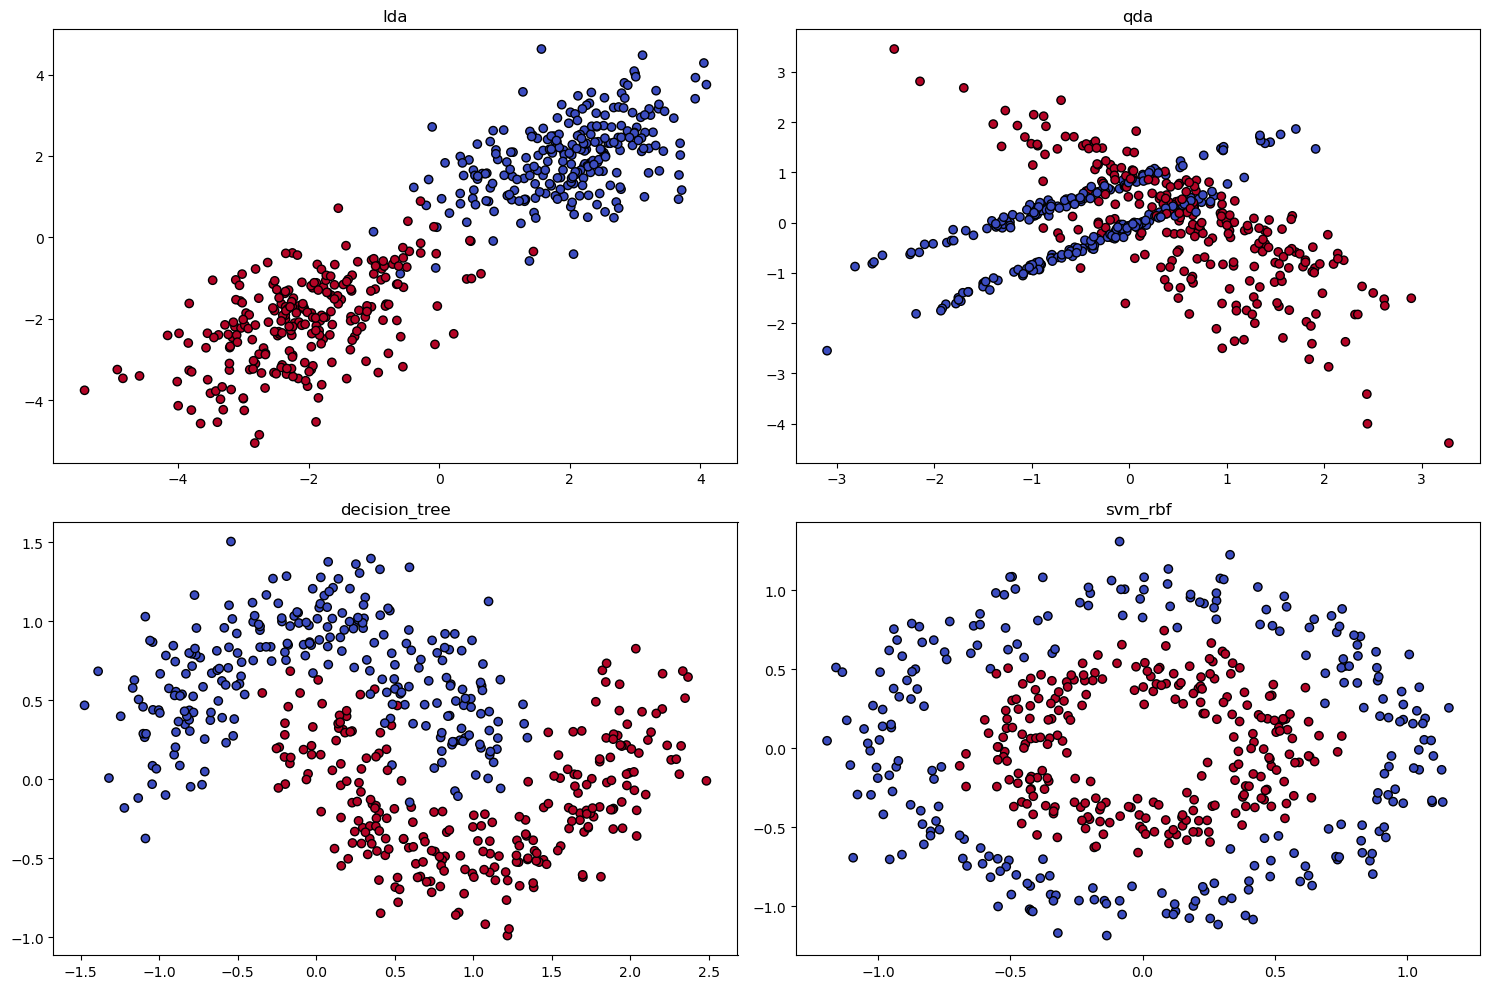

In [6]:
datasets = generate_datasets(n_samples=500, k=250)
plot_datasets(datasets)

### Methods

- Logistic regression

- LDA

- QDA

- Decision Tree without pruning

- Decision Tree with a maximum depth of 2

- SVM linear

- SVM RBF

### Investigate method assumptions


- Logistic regression

- LDA

- QDA

- Decision Tree without pruning

- Decision Tree with a maximum depth of 2

- SVM linear

- SVM RBF

### Bias variance and model capacity

### Ensembles